In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot
import numpy as np

In [2]:
DATA_PATH = "/home/mathuis/Development/cyber_wolf/data"
HL_SIZE = 12

In [3]:
def load_data(path: str):
    print("Loading data")
    return np.load(path, allow_pickle=True)


def build_model():
    print("Building model")
    
    input_layer = layers.Input(shape=(98,))
    encoded = layers.Dense(HL_SIZE, activation="relu")(input_layer)
    decoded = layers.Dense(98, activation="relu")(encoded)

    model = keras.Model(input_layer, decoded)    

    return model

def train_model(model, x_train, x_test):
    print("Compiling model")
    model.compile(optimizer="adam", loss="mse", metrics=["mse", "msle", "mae", "mape", "cosine_similarity"])
    print("Training model")
    return model.fit(x_train, x_train, epochs=6, batch_size=32, validation_data=(x_test, x_test))


def plot(history):
    print(history.keys())

    for key in history.keys():
        if not key.startswith("val_"):
            pyplot.plot()

            pyplot.title(key)
            pyplot.plot(history[key], label="train")
            pyplot.plot(history[f"val_{key}"], label="test")
            pyplot.xlabel("Epoch")
            pyplot.ylabel(key)
            pyplot.legend()

            pyplot.show()

def evaluate_model(model, x_test):
    results = model.evaluate(x_test, x_test)
    print(f"Test Loss: {results}")

In [4]:
x_train = load_data(f"{DATA_PATH}/datasets/x_train.npy")
x_test = load_data(f"{DATA_PATH}/datasets/x_test.npy")
    

Loading data
Loading data


In [5]:
model = build_model()
model.summary()

Building model
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 98)]              0         
_________________________________________________________________
dense (Dense)                (None, 12)                1188      
_________________________________________________________________
dense_1 (Dense)              (None, 98)                1274      
Total params: 2,462
Trainable params: 2,462
Non-trainable params: 0
_________________________________________________________________


In [6]:
res = train_model(model, x_train, x_test)

Compiling model
Training model
Epoch 1/6
302/302 [==============================] - 2s 3ms/step - loss: 10.3100 - mse: 10.3100 - msle: 0.1612 - mae: 0.4676 - mape: 148066957.8614 - cosine_similarity: 0.6456 - val_loss: 0.7627 - val_mse: 0.7627 - val_msle: 0.0994 - val_mae: 0.2339 - val_mape: 45863376.0000 - val_cosine_similarity: 0.9012
Epoch 2/6
302/302 [==============================] - 1s 2ms/step - loss: 0.7189 - mse: 0.7189 - msle: 0.0986 - mae: 0.2314 - mape: 43433105.3465 - cosine_similarity: 0.9028 - val_loss: 0.5030 - val_mse: 0.5030 - val_msle: 0.0886 - val_mae: 0.2047 - val_mape: 34873636.0000 - val_cosine_similarity: 0.9017
Epoch 3/6
302/302 [==============================] - 1s 2ms/step - loss: 0.4688 - mse: 0.4688 - msle: 0.0871 - mae: 0.1990 - mape: 33048690.2574 - cosine_similarity: 0.9027 - val_loss: 0.4260 - val_mse: 0.4260 - val_msle: 0.0853 - val_mae: 0.1892 - val_mape: 28404652.0000 - val_cosine_similarity: 0.9020
Epoch 4/6
302/302 [==============================] 

dict_keys(['loss', 'mse', 'msle', 'mae', 'mape', 'cosine_similarity', 'val_loss', 'val_mse', 'val_msle', 'val_mae', 'val_mape', 'val_cosine_similarity'])


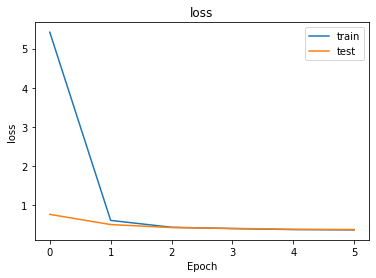

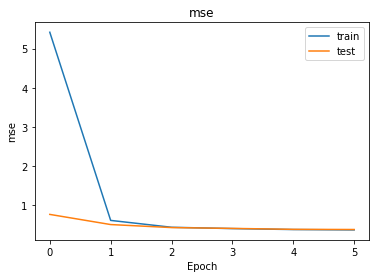

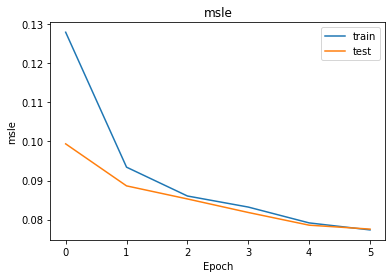

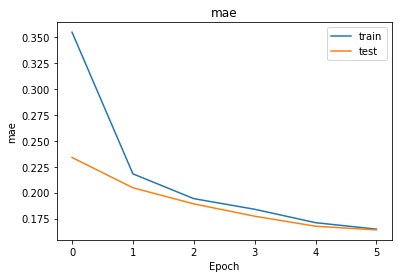

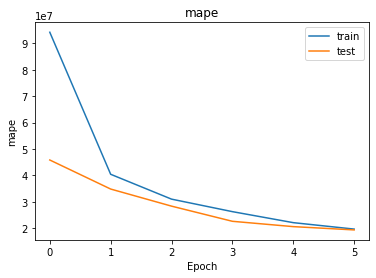

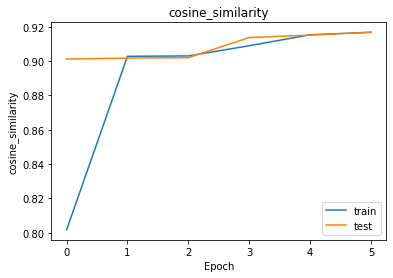

In [7]:
# print(res.history.keys())
plot(res.history)

In [8]:
evaluate_model(model, x_test[:1])

1/1 [==============================] - 0s 30ms/step - loss: 0.4553 - mse: 0.4553 - msle: 0.1308 - mae: 0.2689 - mape: 31122922.0000 - cosine_similarity: 0.9806
Test Loss: [0.4553341865539551, 0.4553341865539551, 0.13076259195804596, 0.26891809701919556, 31122922.0, 0.9805874228477478]


In [9]:
pred = model.predict(x_test)
print(x_test[0])
print(pred[0])

[ 0.  1.  0. 33.  2.  0.  2.  2.  2.  1.  0.  0.  2.  0.  0.  2.  1.  2.
  3.  2.  0.  2.  0.  1.  1.  0.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.
  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.          0.          0.         33.31103     2.0074942   0.
  1.5984656   0.          0.          0.11434391  1.118866    0.
  1.9373354   0.          0.          1.7003274   0.          1.7475977
  1.5098581   0.          0.          0.40666944  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.     

In [10]:
# model.save(f"{DATA_PATH}/models/1h-12n-6e-b32-mse_loss-notnorm-model.h5")